In [1]:
from math import floor

import numpy as np
import pandas as pd
from soupsieve import closest

## Function for generating random numbers

In [2]:
import random as rd

def get_random_list(size):
    random_list = (rd.sample(range(-size, size), size))
    return random_list

In [3]:
size = pow(2,5)
random_list = get_random_list(size)
print(random_list)

[22, 29, -21, 30, -22, -30, 26, 14, 3, -7, -15, -6, 13, -19, -25, -18, 9, -16, 24, 31, -32, 4, -27, 10, 0, -26, -1, 20, -5, -10, 15, 12]


## Function for generating random set of points

In [4]:
def get_random_points(size):
    x_list = get_random_list(size)
    y_list = get_random_list(size)
    
    random_points = np.column_stack((x_list, y_list))
    
    return random_points    

In [5]:
size = pow(2,3)
points_list = get_random_points(size)
print(points_list)

[[ 5 -6]
 [-3  2]
 [-2  5]
 [ 2  4]
 [-8 -8]
 [ 3 -1]
 [ 7 -2]
 [-4  0]]


## Function for calculating Euclidian Distance

In [22]:
def euclidean_distance(p1, p2):
    d = np.sqrt(((p1[0] - p2[0]) ** 2) + ((p1[1] - p2[1]) ** 2))
    return d

## Function for visualizing points

In [205]:
import matplotlib.pyplot as plt

def plot_points(points, closest_pair=None, width=10, height=10):
    x_points = points[:,0]
    y_points = points[:,1]
    
    plt.figure(figsize=(width, height))
    if closest_pair is not None:
        plt.plot(closest_pair[:,0], closest_pair[:,1], color = 'r')
    plt.plot(x_points, y_points, 'o')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title('Random points set')
    plt.xticks(np.arange(min(x_points), max(x_points)+1, 1.0))
    plt.yticks(np.arange(min(y_points), max(y_points)+1, 1.0))
    plt.grid()
    plt.show()

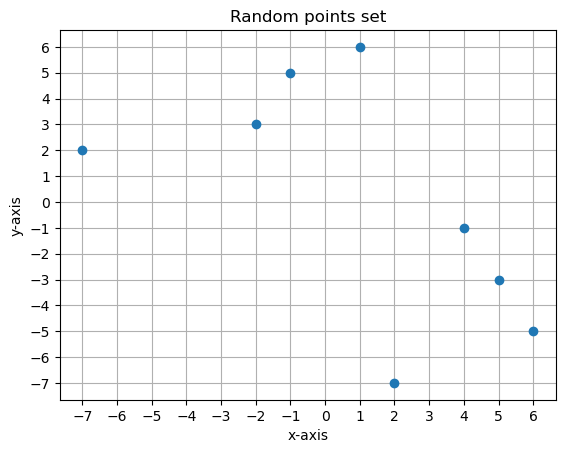

In [122]:
plot_points(points_list)


## Brute force approach to closest pair

In [9]:
def brute_force_closest_pair(points_list):
    d = euclidean_distance(points_list[0], points_list[1])
    closest_pair = np.array([points_list[0]])
    closest_pair = np.append(closest_pair, [points_list[1]], axis=0)
    
    
    for i in range (0, len(points_list)):
        for j in range (i+1, len(points_list)):
            if euclidean_distance(points_list[i], points_list[j]) < d:
                d = euclidean_distance(points_list[i], points_list[j])
                closest_pair = np.array([points_list[i]])
                closest_pair = np.append(closest_pair, [points_list[j]], axis=0)
    return d, closest_pair

In [213]:
size = pow(2,10)
points_list = get_random_points(size)
distance, closest_pair = brute_force_closest_pair(points_list)
# plot_points(points_list, closest_pair)

## Merge Sort

### Merge function

In [134]:
def merge(left_start, left_end, right_start, right_end, points_list, mode):
    if mode == 'x':
        column = 0
    elif mode == 'y':
        column = 1
    temp_list = np.empty((len(points_list),2), dtype=int)
    i = 0
    j = 0
    for i in range(left_end, left_start-1, -1):
        temp_list[i] = points_list[i]

    for j in range(right_start, right_end+1):
        temp_list[right_end+right_start-j] = points_list[j]
    
    i = left_start
    j = right_end
    for k in range(left_start, right_end+1):
        if temp_list[i][column] < temp_list[j][column]:
            points_list[k] = temp_list[i]
            i += 1
        else:
            points_list[k] = temp_list[j]
            j -= 1
            
    return points_list

In [135]:
def merge_sort(left, right, points_list, mode):
    if right - left > 0:
        mid = int(np.floor((left+right)/2))
        points_list = merge_sort(left, mid, points_list, mode)
        points_list = merge_sort(mid+1, right, points_list, mode)
        points_list = merge(left, mid, mid+1, right, points_list, mode)
        return points_list
    return points_list

## Divide and conquer approach to closest pair

### Sorting points by x-axis

In [13]:
size = pow(2,3)
points_list = get_random_points(size)
print(points_list)
points_list = merge_sort(0, len(points_list)-1, points_list, 'x')
# print(points_list)
for point in points_list:
    print(point)

[[-8 -1]
 [ 1 -8]
 [-1 -4]
 [ 4 -2]
 [-5  3]
 [-4 -7]
 [ 7  1]
 [-2  6]]
[-8 -1]
[-5  3]
[-4 -7]
[-2  6]
[-1 -4]
[ 1 -8]
[ 4 -2]
[7 1]


### Create strip

In [172]:
def create_strip(points_list, d, mid_point):
    strip = np.empty((0,2), dtype=int)
    for point in points_list:
        if abs(point[0] - mid_point[0]) < d:
            strip = np.append(strip, [point], axis=0)
            
    return strip

### Finding closest pair

In [173]:
def closest_pair_divide_and_conquer(d, points_list):
    if len(points_list) <= 3:
        d, closest_pair = brute_force_closest_pair(points_list)
        points_list = merge_sort(0, len(points_list)-1, points_list, 'y')
        return d, points_list, closest_pair
    mid = int(np.floor(len(points_list)/2))
    mid_point = points_list[mid]
    d1, points_list1, closest_pair1 = closest_pair_divide_and_conquer(d, points_list[0:mid])
    d2, points_list2, closest_pair2 = closest_pair_divide_and_conquer(d, points_list[mid:len(points_list)])
    points_list = np.concatenate((points_list1, points_list2), axis=0)
    points_list = merge_sort(0, len(points_list)-1, points_list, 'y')
    d = min(d1, d2)
    closest_pair = closest_pair1 if d == d1 else closest_pair2
    strip = create_strip(points_list, d, mid_point)
    
    for i in range(len(strip)):
        j=1
        while (i + j) < len(strip) and j <= 7:
            if euclidean_distance(strip[i], strip[i+j]) < d:
                d = euclidean_distance(strip[i], strip[i+j])
                closest_pair = np.array([strip[i]])
                closest_pair = np.append(closest_pair, [strip[i+j]], axis=0)
            j+=1
    return d, points_list, closest_pair   

In [214]:
size = pow(2,10)
points_list = get_random_points(size)
points_list = merge_sort(0, len(points_list)-1, points_list, 'x')
d = euclidean_distance(points_list[0], points_list[1])
# plot_points(points_list, closest_pair, 20, 15)

In [215]:
distance, points_list, closest_pair = closest_pair_divide_and_conquer(d,points_list)

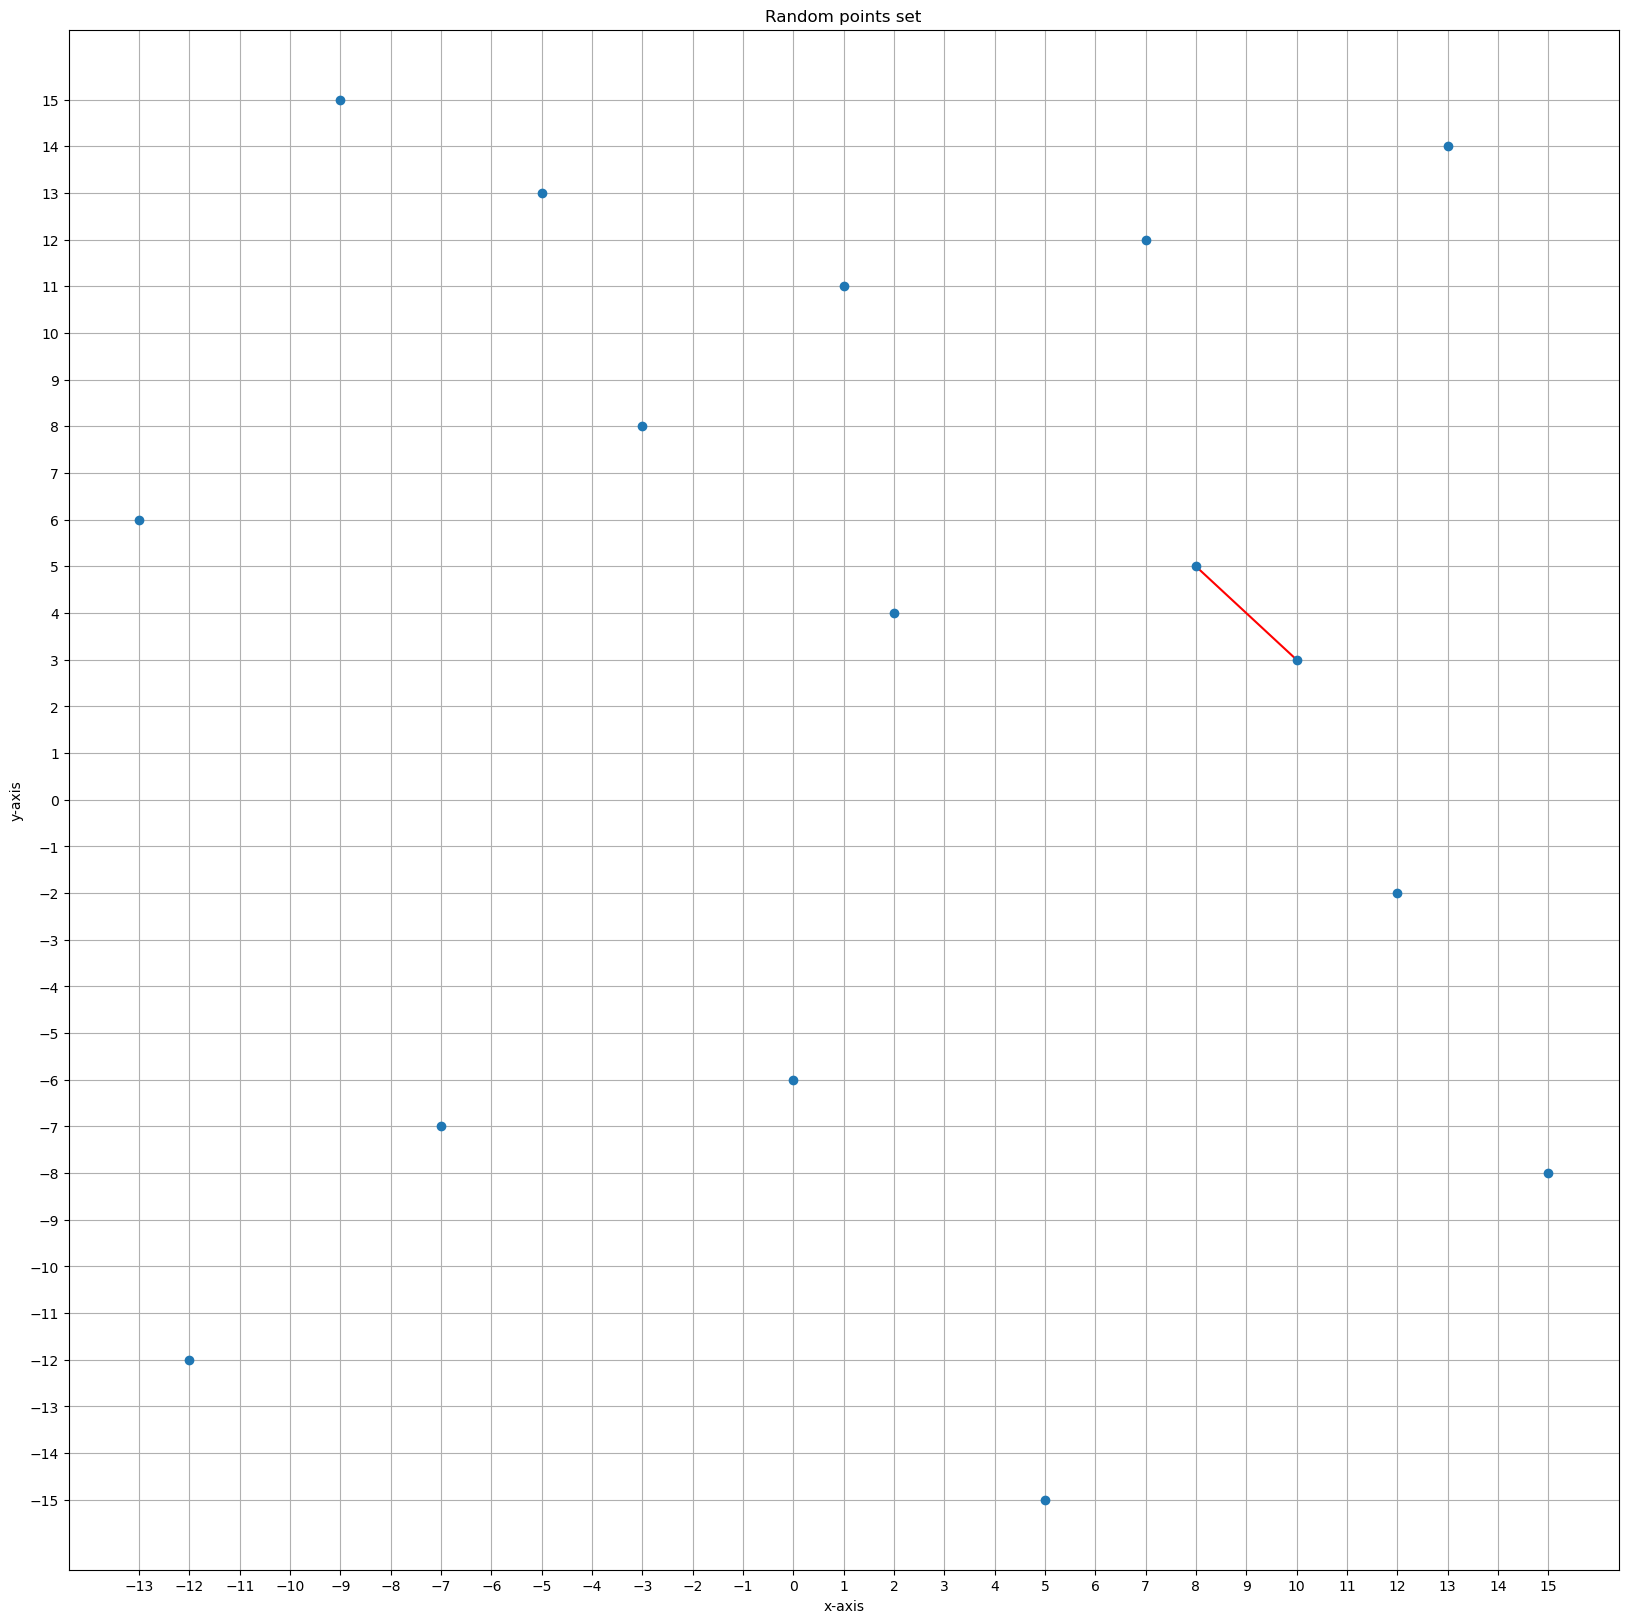

In [206]:
points_list = merge_sort(0, len(points_list)-1, points_list, 'x')
distance, points_list, closest_pair = closest_pair_divide_and_conquer(d,points_list)
plot_points(points_list, closest_pair, 20, 20)

In [150]:
print(euclidean_distance(closest_pair[0], closest_pair[1]))
print(distance)

3.1622776601683795
3.1622776601683795


## Testing of times

In [227]:
power = 13

### Brute force
#### Setup

In [223]:
size = pow(2,power)
points_list = get_random_points(size)

#### Execution

In [224]:
d, closest_pair = brute_force_closest_pair(points_list)

### Divide and conquer
#### Setup

In [228]:
size = pow(2,power)
points_list = get_random_points(size)
points_list = merge_sort(0, len(points_list)-1, points_list, 'x')

#### Execution

In [229]:
d, points_list, closest_pair = closest_pair_divide_and_conquer(d,points_list)